In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Vivek Angadi\.conda\envs\tsa_course\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Vivek Angadi\.conda\envs\tsa_course\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Vivek Angadi\.conda\envs\tsa_course\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Vivek Angadi\.conda\envs\tsa_course\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [97]:
import warnings
warnings.filterwarnings('ignore')

In [125]:
churn_data = pd.read_csv('churn_data.csv')
internet_data = pd.read_csv('internet_data.csv')
customer_data = pd.read_csv('customer_data.csv')

In [126]:
print(len(churn_data))
print(len(internet_data))
print(len(customer_data))

7043
7043
7043


In [127]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [128]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [129]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [130]:
churn_inter = pd.merge(customer_data,internet_data,on='customerID',how='inner')

In [131]:
df =  pd.merge(churn_data,churn_inter,on='customerID',how='inner')

In [132]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [133]:
round((df.isnull().sum()/len(df)),2)

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [135]:
df.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [136]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [137]:
binary_var = ['PhoneService','PaperlessBilling','Churn','Partner','Dependents','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
def binary_map(x):
    return x.map({'Yes':1,'No':0})

df[binary_var] = df[binary_var].apply(binary_map)
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
df.describe()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000,5517.000000
mean,32.371149,0.903166,0.592219,64.761692,0.265370,0.162147,0.483033,0.299588,0.365960,0.440276,0.439007,0.370491,0.490665,0.495197
std,24.559481,0.295752,0.491457,30.090047,0.441561,0.368612,0.499748,0.458110,0.481742,0.496465,0.496311,0.482980,0.499958,0.500022
min,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,1.000000,0.000000,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,1.000000,70.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,89.850000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,1.000000,1.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


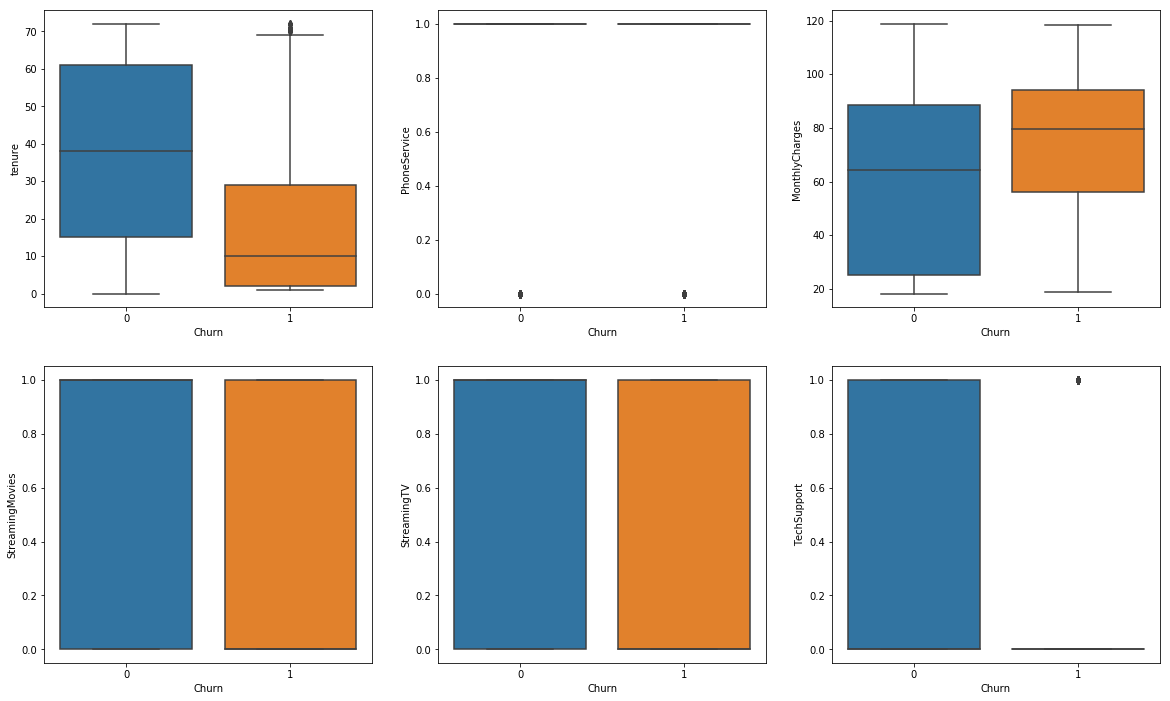

In [64]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x='Churn',y='tenure',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Churn',y='PhoneService',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Churn',y='MonthlyCharges',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='Churn',y='StreamingMovies',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Churn',y='StreamingTV',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='Churn',y='TechSupport',data=df)


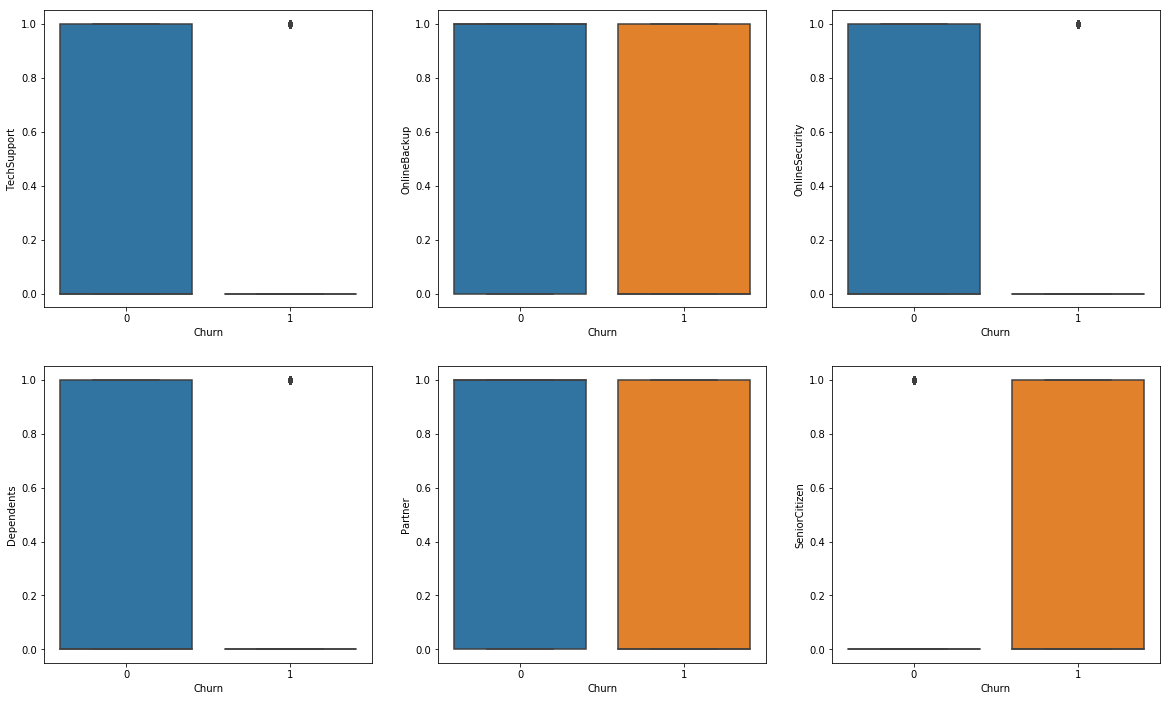

In [65]:
plt.figure(figsize=(20,12),num=3)
plt.subplot(2,3,1)
sns.boxplot(x='Churn',y='TechSupport',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Churn',y='OnlineBackup',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Churn',y='OnlineSecurity',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='Churn',y='Dependents',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Churn',y='Partner',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='Churn',y='SeniorCitizen',data=df)

plt.show()

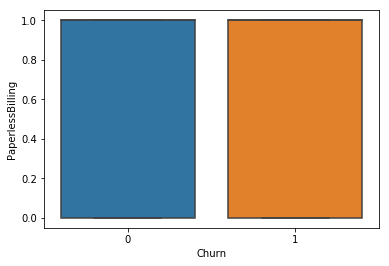

In [66]:

sns.boxplot(x='Churn',y='PaperlessBilling',data=df)

plt.show()

In [112]:
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


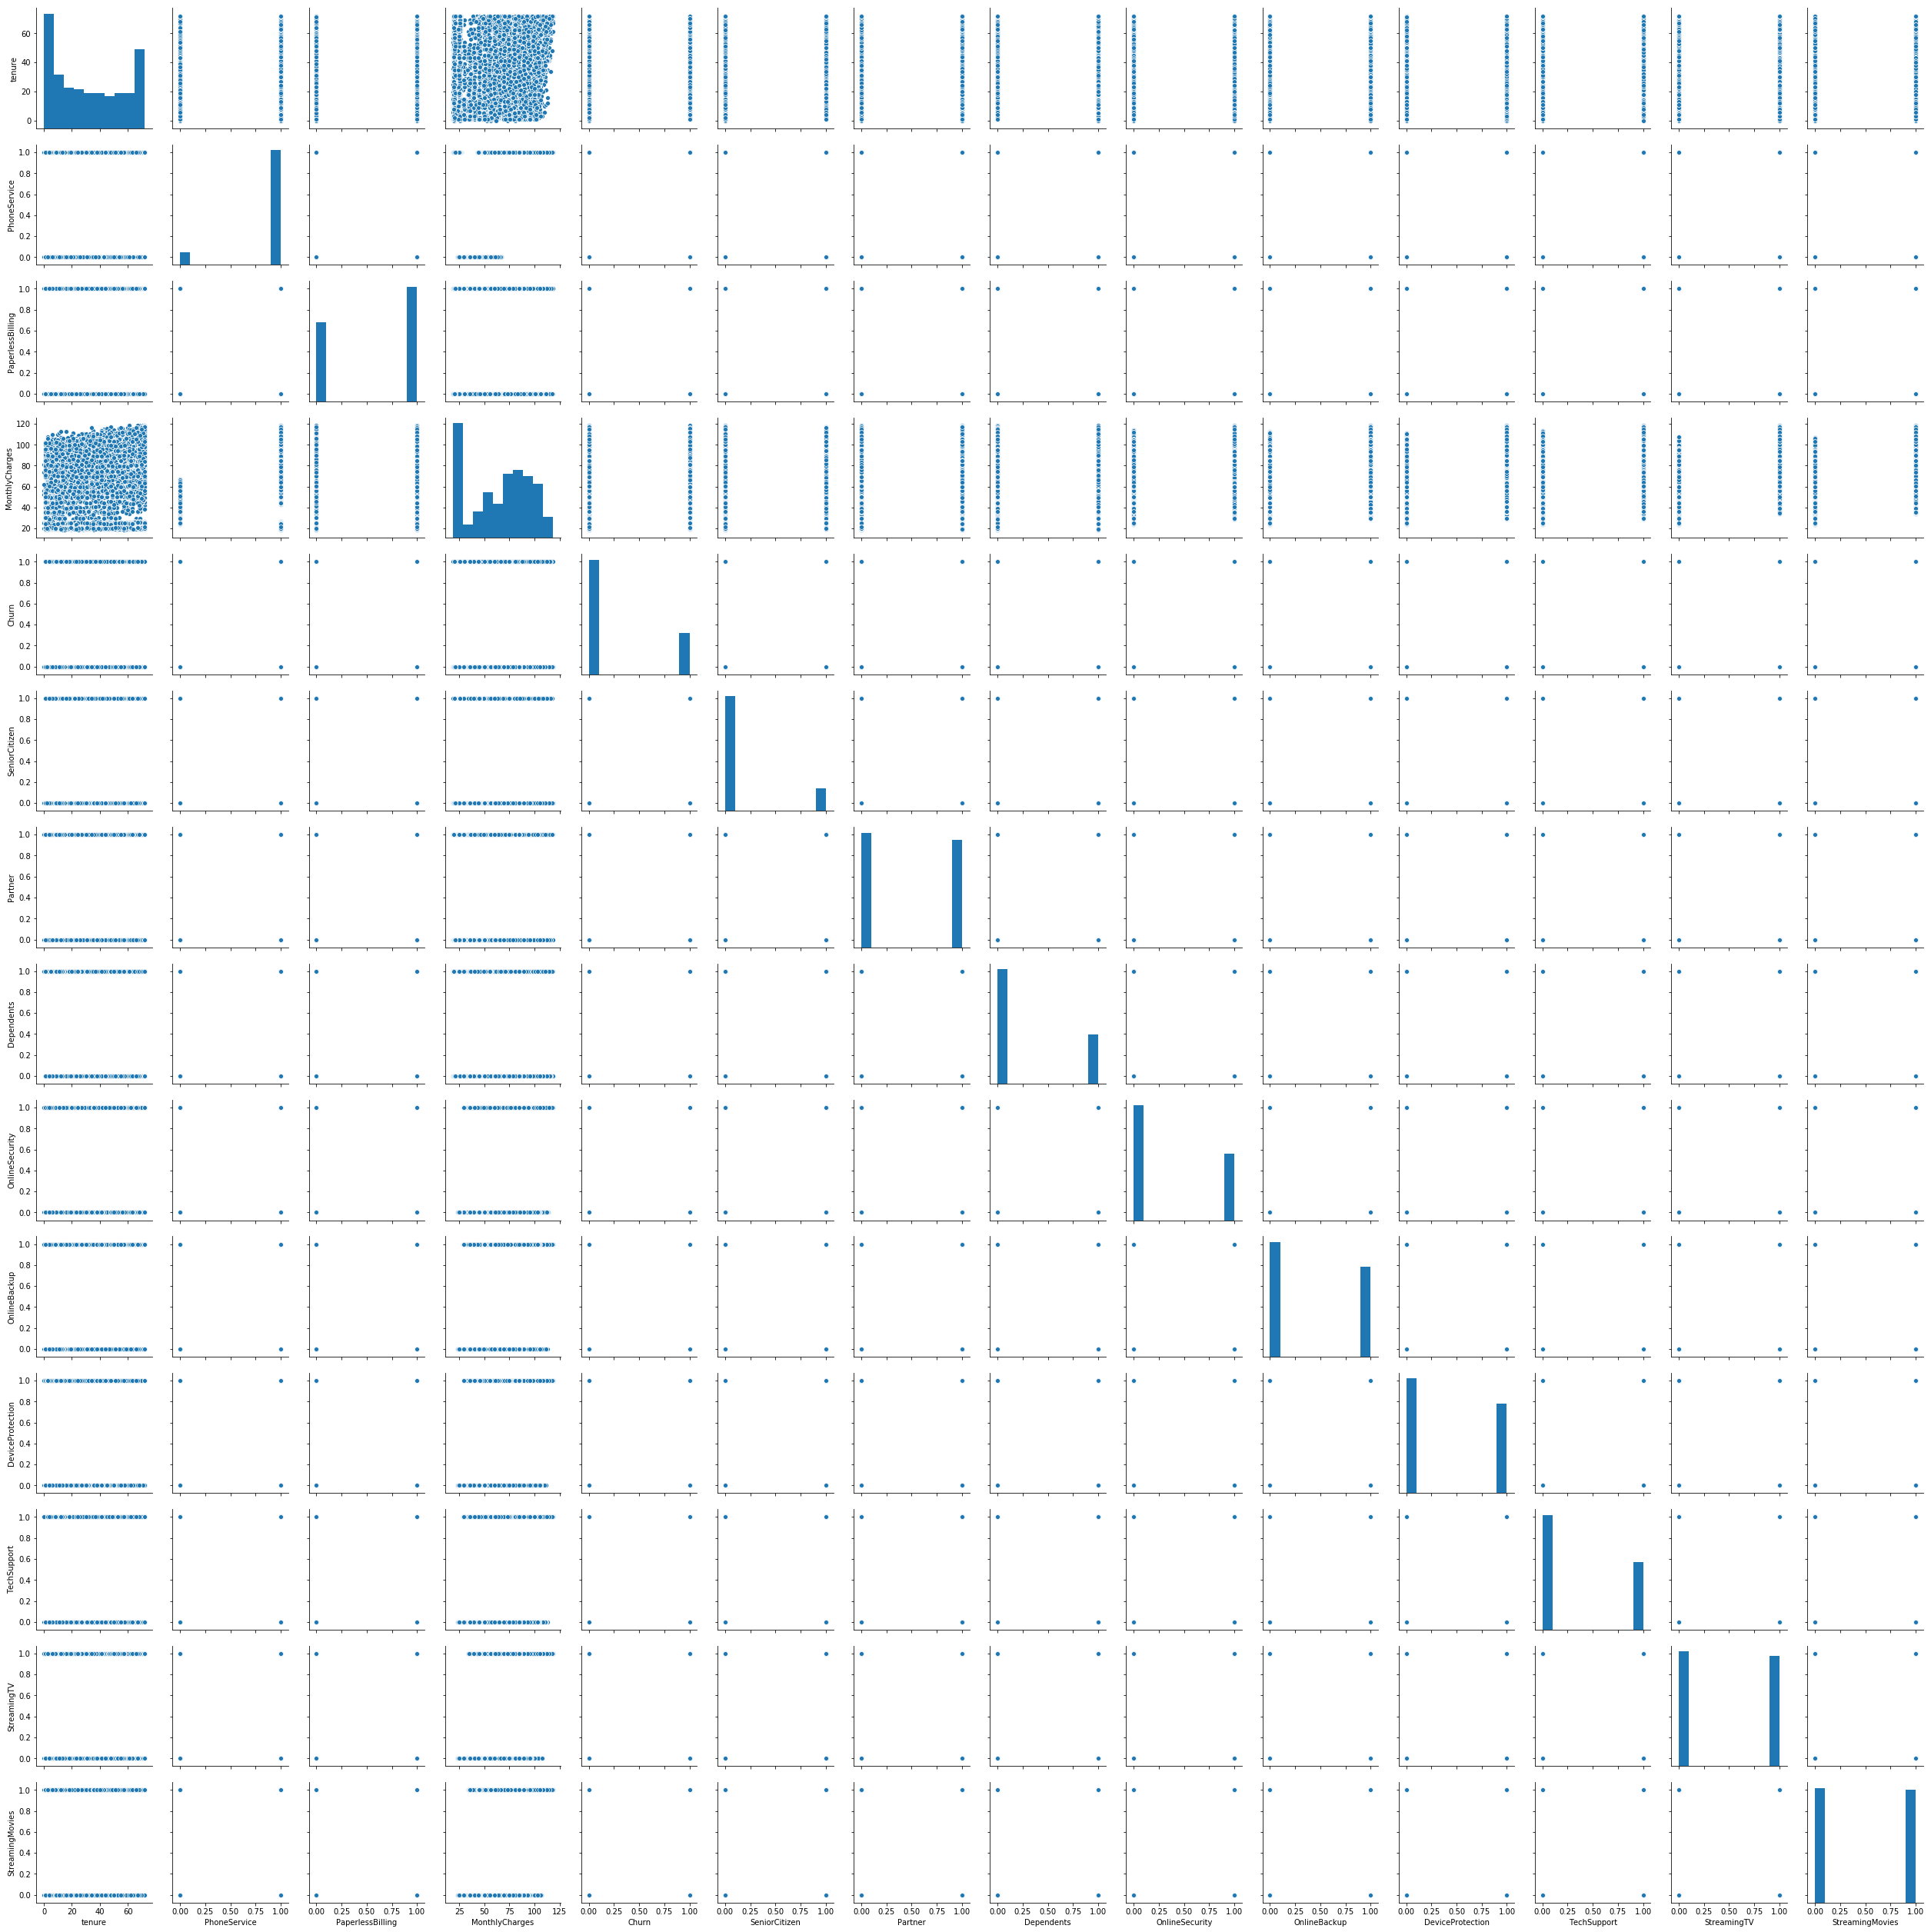

In [68]:
sns.pairplot(df)

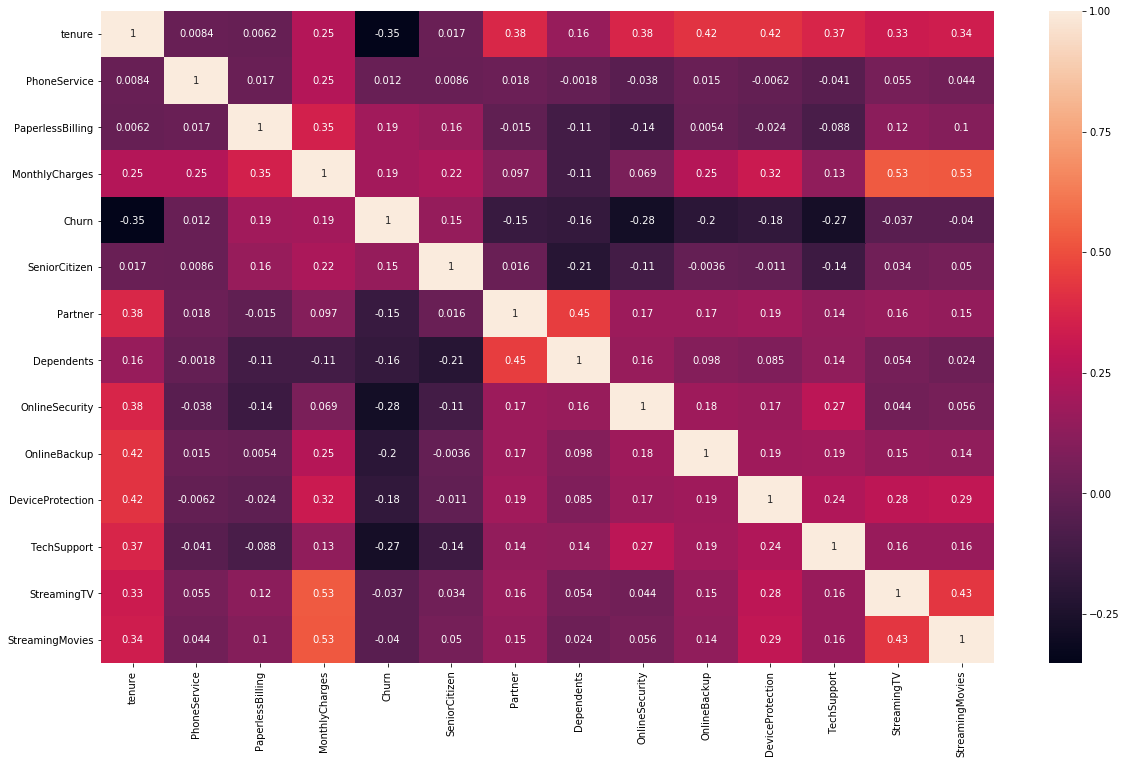

In [70]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [139]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
minmax_var = ['tenure','MonthlyCharges','TotalCharges']
df['TotalCharges'] = df['TotalCharges'].convert_objects(convert_numeric=True)
df[minmax_var] = scaler.fit_transform(df[minmax_var])
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,0.013889,0,Month-to-month,1,Electronic check,0.115423,0.001275,0,Female,...,1,0,No phone service,DSL,0.0,1.0,0.0,0.0,0.0,0.0
1,5575-GNVDE,0.472222,1,One year,0,Mailed check,0.385075,0.215867,0,Male,...,0,0,No,DSL,1.0,0.0,1.0,0.0,0.0,0.0
2,3668-QPYBK,0.027778,1,Month-to-month,1,Mailed check,0.354229,0.010310,1,Male,...,0,0,No,DSL,1.0,1.0,0.0,0.0,0.0,0.0
3,7795-CFOCW,0.625000,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0,Male,...,0,0,No phone service,DSL,1.0,0.0,1.0,1.0,0.0,0.0
4,9237-HQITU,0.027778,1,Month-to-month,1,Electronic check,0.521891,0.015330,1,Female,...,0,0,No,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
df['Contract'].unique()
contract = pd.get_dummies(df['Contract'],prefix='contract',drop_first=True)
df = pd.concat([df,contract])
df.drop(['Contract'],axis=1)

,Churn,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,...,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,contract_One year,contract_Two year,customerID,gender,tenure
0,0.0,0.0,0.0,DSL,0.115423,No phone service,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.001275,NaN,NaN,7590-VHVEG,Female,0.013889
1,0.0,0.0,1.0,DSL,0.385075,No,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.215867,NaN,NaN,5575-GNVDE,Male,0.472222
2,1.0,0.0,0.0,DSL,0.354229,No,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.010310,NaN,NaN,3668-QPYBK,Male,0.027778
3,0.0,0.0,1.0,DSL,0.239303,No phone service,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.210241,NaN,NaN,7795-CFOCW,Male,0.625000
4,1.0,0.0,0.0,Fiber optic,0.521891,No,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.015330,NaN,NaN,9237-HQITU,Female,0.027778
5,1.0,0.0,1.0,Fiber optic,0.809950,Yes,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.092511,NaN,NaN,9305-CDSKC,Female,0.111111
6,0.0,1.0,0.0,Fiber optic,0.704975,Yes,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.222779,NaN,NaN,1452-KIOVK,Male,0.305556
7,0.0,0.0,0.0,DSL,0.114428,No phone service,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.032668,NaN,NaN,6713-OKOMC,Female,0.138889
8,1.0,0.0,1.0,Fiber optic,0.861194,Yes,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.349325,NaN,NaN,7892-POOKP,Female,0.388889
9,0.0,1.0,0.0,DSL,0.377114,No,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.400317,NaN,NaN,6388-TABGU,Male,0.861111


In [141]:
df['PaymentMethod'].unique()
PaymentMethod = pd.get_dummies(df['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
df = pd.concat([df,PaymentMethod],axis=1)
df.drop(['PaymentMethod'],axis=1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,...,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0.013889,0,Month-to-month,1,0.115423,0.001275,0,Female,0,...,DSL,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
1,5575-GNVDE,0.472222,1,One year,0,0.385075,0.215867,0,Male,0,...,DSL,1.0,0.0,1.0,0.0,0.0,0.0,0,0,1
2,3668-QPYBK,0.027778,1,Month-to-month,1,0.354229,0.010310,1,Male,0,...,DSL,1.0,1.0,0.0,0.0,0.0,0.0,0,0,1
3,7795-CFOCW,0.625000,0,One year,0,0.239303,0.210241,0,Male,0,...,DSL,1.0,0.0,1.0,1.0,0.0,0.0,0,0,0
4,9237-HQITU,0.027778,1,Month-to-month,1,0.521891,0.015330,1,Female,0,...,Fiber optic,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0
5,9305-CDSKC,0.111111,1,Month-to-month,1,0.809950,0.092511,1,Female,0,...,Fiber optic,0.0,0.0,1.0,0.0,1.0,1.0,0,1,0
6,1452-KIOVK,0.305556,1,Month-to-month,1,0.704975,0.222779,0,Male,0,...,Fiber optic,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0
7,6713-OKOMC,0.138889,0,Month-to-month,0,0.114428,0.032668,0,Female,0,...,DSL,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1
8,7892-POOKP,0.388889,1,Month-to-month,1,0.861194,0.349325,1,Female,0,...,Fiber optic,0.0,0.0,1.0,1.0,1.0,1.0,0,1,0
9,6388-TABGU,0.861111,1,One year,0,0.377114,0.400317,0,Male,0,...,DSL,1.0,1.0,0.0,0.0,0.0,0.0,0,0,0


In [142]:
df['gender'] = df['gender'].map({'Female':0,'Male':1})

In [143]:
df['MultipleLines'].unique()
MultipleLines = pd.get_dummies(df['MultipleLines'],prefix='MultipleLines',drop_first=True)
df = pd.concat([df,MultipleLines],axis=1)
df.drop(['MultipleLines'],axis=1)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0.013889,0,Month-to-month,1,Electronic check,0.115423,0.001275,0,0,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
1,5575-GNVDE,0.472222,1,One year,0,Mailed check,0.385075,0.215867,0,1,...,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0
2,3668-QPYBK,0.027778,1,Month-to-month,1,Mailed check,0.354229,0.010310,1,1,...,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0
3,7795-CFOCW,0.625000,0,One year,0,Bank transfer (automatic),0.239303,0.210241,0,1,...,0.0,1.0,1.0,0.0,0.0,0,0,0,1,0
4,9237-HQITU,0.027778,1,Month-to-month,1,Electronic check,0.521891,0.015330,1,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0
5,9305-CDSKC,0.111111,1,Month-to-month,1,Electronic check,0.809950,0.092511,1,0,...,0.0,1.0,0.0,1.0,1.0,0,1,0,0,1
6,1452-KIOVK,0.305556,1,Month-to-month,1,Credit card (automatic),0.704975,0.222779,0,1,...,1.0,0.0,0.0,1.0,0.0,1,0,0,0,1
7,6713-OKOMC,0.138889,0,Month-to-month,0,Mailed check,0.114428,0.032668,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
8,7892-POOKP,0.388889,1,Month-to-month,1,Electronic check,0.861194,0.349325,1,0,...,0.0,1.0,1.0,1.0,1.0,0,1,0,0,1
9,6388-TABGU,0.861111,1,One year,0,Bank transfer (automatic),0.377114,0.400317,0,1,...,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0


In [119]:
df['InternetService'].unique()
InternetService = pd.get_dummies(df['InternetService'],prefix='InternetService',drop_first=True)
df = pd.concat([df,InternetService],axis=1)
df.drop(['InternetService'],axis=1)

,Churn,Contract,Dependents,DeviceProtection,InternetService_Fiber optic,InternetService_No,MonthlyCharges,MultipleLines,MultipleLines_No phone service,MultipleLines_Yes,...,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,contract_One year,contract_Two year,customerID,gender,tenure
0,0.0,Month-to-month,0.0,0.0,NaN,NaN,0.115423,No phone service,NaN,NaN,...,0.0,0.0,0.0,0.0,0.001275,NaN,NaN,7590-VHVEG,0.0,0.013889
1,0.0,One year,0.0,1.0,NaN,NaN,0.385075,No,NaN,NaN,...,0.0,0.0,0.0,0.0,0.215867,NaN,NaN,5575-GNVDE,1.0,0.472222
2,1.0,Month-to-month,0.0,0.0,NaN,NaN,0.354229,No,NaN,NaN,...,0.0,0.0,0.0,0.0,0.010310,NaN,NaN,3668-QPYBK,1.0,0.027778
3,0.0,One year,0.0,1.0,NaN,NaN,0.239303,No phone service,NaN,NaN,...,0.0,0.0,0.0,1.0,0.210241,NaN,NaN,7795-CFOCW,1.0,0.625000
4,1.0,Month-to-month,0.0,0.0,NaN,NaN,0.521891,No,NaN,NaN,...,0.0,0.0,0.0,0.0,0.015330,NaN,NaN,9237-HQITU,0.0,0.027778
5,1.0,Month-to-month,0.0,1.0,NaN,NaN,0.809950,Yes,NaN,NaN,...,0.0,1.0,1.0,0.0,0.092511,NaN,NaN,9305-CDSKC,0.0,0.111111
6,0.0,Month-to-month,1.0,0.0,NaN,NaN,0.704975,Yes,NaN,NaN,...,0.0,0.0,1.0,0.0,0.222779,NaN,NaN,1452-KIOVK,1.0,0.305556
7,0.0,Month-to-month,0.0,0.0,NaN,NaN,0.114428,No phone service,NaN,NaN,...,0.0,0.0,0.0,0.0,0.032668,NaN,NaN,6713-OKOMC,0.0,0.138889
8,1.0,Month-to-month,0.0,1.0,NaN,NaN,0.861194,Yes,NaN,NaN,...,0.0,1.0,1.0,1.0,0.349325,NaN,NaN,7892-POOKP,0.0,0.388889
9,0.0,One year,1.0,0.0,NaN,NaN,0.377114,No,NaN,NaN,...,0.0,0.0,0.0,0.0,0.400317,NaN,NaN,6388-TABGU,1.0,0.861111


In [144]:
df.drop(['InternetService','Contract','PaymentMethod','InternetService'],axis=1,inplace=True)

In [145]:
df.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No phone service,MultipleLines_Yes
0,7590-VHVEG,0.013889,0,1,0.115423,0.001275,0,0,0,1,...,1.0,0.0,0.0,0.0,0.0,0,1,0,1,0
1,5575-GNVDE,0.472222,1,0,0.385075,0.215867,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0,0,1,0,0
2,3668-QPYBK,0.027778,1,1,0.354229,0.010310,1,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0,0,1,0,0
3,7795-CFOCW,0.625000,0,0,0.239303,0.210241,0,1,0,0,...,0.0,1.0,1.0,0.0,0.0,0,0,0,1,0
4,9237-HQITU,0.027778,1,1,0.521891,0.015330,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0


In [149]:
df.isnull().sum()

customerID                                  0
tenure                                      0
PhoneService                                0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
MultipleLines                               0
OnlineSecurity                           1526
OnlineBackup                             1526
DeviceProtection                         1526
TechSupport                              1526
StreamingTV                              1526
StreamingMovies                          1526
PaymentMethod_Credit card (automatic)       0
PaymentMethod_Electronic check              0
PaymentMethod_Mailed check                  0
MultipleLines_No phone service    

In [150]:
df.dropna(inplace=True)

In [151]:
len(df)

5512

In [152]:
import statsmodels.api as sm

In [153]:
from sklearn.model_selection import train_test_split

In [154]:
y = df.pop('Churn')
X = df 

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [165]:

log1 = sm.GLM(y_train,sm.add_constant(X_train.astype(float)),family=sm.families.Binomial()).fit()

In [166]:
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3673
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.4
Date:                Sat, 31 Aug 2019   Deviance:                       3494.8
Time:                        23:52:45   Pearson chi2:                 3.73e+03
No. Iterations:                    17   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5978      0.147     -4.077      0.000      -0.885      -0.310
tenure                                   -4.3984      0.627     -7.015      0.000      -5.627      -3.169
PhoneService                             -0.8901      0.140     -6.336      0.000      -1.165      -0.615
PaperlessBilling                          0.4114      0.097      4.244      0.000       0.221       0.601
MonthlyCharges                            3.3708      0.488      6.912      0.000       2.415       4.327
TotalCharges                              2.0144      0.839      2.402      0.016       0.371       3.658
gender                                   -0.0570      0.083     -0.682      0.495      -0.221       0.107
SeniorCitizen                             0.2553      0.104      2.453      0.014       0.051       0.459
Partner                                   0.0274      0.098      0.280      0.779      -0.164       0.219
Dependents                               -0.1730      0.114     -1.517      0.129      -0.396       0.050
OnlineSecurity                           -0.6336      0.102     -6.239      0.000      -0.833      -0.435
OnlineBackup                             -0.2778      0.096     -2.907      0.004      -0.465      -0.091
DeviceProtection                         -0.3182      0.098     -3.238      0.001      -0.511      -0.126
TechSupport                              -0.6371      0.102     -6.251      0.000      -0.837      -0.437
StreamingTV                              -0.1013      0.110     -0.919      0.358      -0.317       0.115
StreamingMovies                          -0.1971      0.109     -1.800      0.072      -0.412       0.017
PaymentMethod_Credit card (automatic)    -0.1807      0.145     -1.245      0.213      -0.465       0.104
PaymentMethod_Electronic check            0.4228      0.119      3.552      0.000       0.190       0.656
PaymentMethod_Mailed check               -0.0806      0.153     -0.528      0.597      -0.380       0.219
MultipleLines_No phone service            0.2923      0.117      2.504      0.012       0.064       0.521
MultipleLines_Yes                         0.2003      0.105      1.901      0.057      -0.006       0.407
=========================================================================================================
"""

In [167]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['colums'] = X_train.columns
vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['vif'] = round(vif['vif'],2)
vif  = vif.sort_values(by="vif",ascending=False)
vif.head(50)

,colums,vif
1,PhoneService,35.53
4,TotalCharges,20.09
0,tenure,15.44
3,MonthlyCharges,6.79
18,MultipleLines_No phone service,4.10
16,PaymentMethod_Electronic check,1.96
13,StreamingTV,1.69
14,StreamingMovies,1.68
17,PaymentMethod_Mailed check,1.64
19,MultipleLines_Yes,1.59


In [168]:
def log_ref(X_1,y_1):
    
    log_1 = sm.GLM(y_1,sm.add_constant(X_1.astype(float)),family=sm.families.Binomial()).fit()
    print(log_1.summary())
    vif = pd.DataFrame()
    vif['colums'] = X_1.columns
    vif['vif'] = [variance_inflation_factor(X_1.values,i) for i in range(X_1.shape[1])]
    vif['vif'] = round(vif['vif'],2)
    vif  = vif.sort_values(by="vif",ascending=False)
    return vif
    

In [169]:
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3673
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.4
Date:                Sun, 01 Sep 2019   Deviance:                       3494.8
Time:                        00:00:20   Pearson chi2:                 3.73e+03
No. Iterations:                    17   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5978      0.147     -4.077      0

,colums,vif
1,PhoneService,35.53
4,TotalCharges,20.09
0,tenure,15.44
3,MonthlyCharges,6.79
18,MultipleLines_No phone service,4.10
16,PaymentMethod_Electronic check,1.96
13,StreamingTV,1.69
14,StreamingMovies,1.68
17,PaymentMethod_Mailed check,1.64
19,MultipleLines_Yes,1.59


In [170]:
X_train.pop('Partner')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3674
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.4
Date:                Sun, 01 Sep 2019   Deviance:                       3494.9
Time:                        00:01:17   Pearson chi2:                 3.73e+03
No. Iterations:                    11   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.5956      0.146     -4.069      0

,colums,vif
1,PhoneService,35.42
4,TotalCharges,20.09
0,tenure,15.34
3,MonthlyCharges,6.79
17,MultipleLines_No phone service,4.09
15,PaymentMethod_Electronic check,1.96
12,StreamingTV,1.69
13,StreamingMovies,1.68
16,PaymentMethod_Mailed check,1.64
18,MultipleLines_Yes,1.59


In [171]:
X_train.pop('PaymentMethod_Mailed check')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3675
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.6
Date:                Sun, 01 Sep 2019   Deviance:                       3495.2
Time:                        00:01:55   Pearson chi2:                 3.73e+03
No. Iterations:                    22   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6333      0.129     -4.923      0

,colums,vif
1,PhoneService,30.28
4,TotalCharges,19.97
0,tenure,15.01
3,MonthlyCharges,6.73
16,MultipleLines_No phone service,3.39
12,StreamingTV,1.69
13,StreamingMovies,1.68
17,MultipleLines_Yes,1.59
15,PaymentMethod_Electronic check,1.43
10,DeviceProtection,1.33


In [172]:
X_train.pop('gender')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3676
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1747.8
Date:                Sun, 01 Sep 2019   Deviance:                       3495.7
Time:                        00:02:21   Pearson chi2:                 3.73e+03
No. Iterations:                    12   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6536      0.125     -5.218      0

,colums,vif
1,PhoneService,29.28
4,TotalCharges,19.97
0,tenure,15.00
3,MonthlyCharges,6.73
15,MultipleLines_No phone service,3.24
11,StreamingTV,1.69
12,StreamingMovies,1.68
16,MultipleLines_Yes,1.59
14,PaymentMethod_Electronic check,1.43
9,DeviceProtection,1.33


In [173]:
X_train.pop('StreamingTV')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3677
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1748.2
Date:                Sun, 01 Sep 2019   Deviance:                       3496.5
Time:                        00:02:46   Pearson chi2:                 3.73e+03
No. Iterations:                    19   Covariance Type:             nonrobust
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.6315      0.123     -5.139      0

,colums,vif
1,PhoneService,27.01
4,TotalCharges,19.97
0,tenure,14.98
3,MonthlyCharges,5.70
14,MultipleLines_No phone service,3.24
11,StreamingMovies,1.68
15,MultipleLines_Yes,1.57
13,PaymentMethod_Electronic check,1.43
9,DeviceProtection,1.33
12,PaymentMethod_Credit card (automatic),1.27


In [174]:
X_train.pop('PaymentMethod_Credit card (automatic)')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3678
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1748.9
Date:                Sun, 01 Sep 2019   Deviance:                       3497.7
Time:                        00:03:14   Pearson chi2:                 3.72e+03
No. Iterations:                    13   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6489      0.122     -5.317      0.000      -0.888     

,colums,vif
1,PhoneService,26.78
4,TotalCharges,19.96
0,tenure,14.94
3,MonthlyCharges,5.69
13,MultipleLines_No phone service,3.20
11,StreamingMovies,1.68
14,MultipleLines_Yes,1.57
9,DeviceProtection,1.33
8,OnlineBackup,1.26
10,TechSupport,1.25


In [175]:
X_train.pop('Dependents')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3679
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1750.1
Date:                Sun, 01 Sep 2019   Deviance:                       3500.3
Time:                        00:03:50   Pearson chi2:                 3.70e+03
No. Iterations:                     9   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6759      0.121     -5.590      0.000      -0.913     

,colums,vif
1,PhoneService,26.40
4,TotalCharges,19.96
0,tenure,14.90
3,MonthlyCharges,5.69
12,MultipleLines_No phone service,3.15
10,StreamingMovies,1.68
13,MultipleLines_Yes,1.57
8,DeviceProtection,1.33
7,OnlineBackup,1.26
9,TechSupport,1.25


In [176]:
X_train.pop('StreamingMovies')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3680
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1751.7
Date:                Sun, 01 Sep 2019   Deviance:                       3503.5
Time:                        00:04:26   Pearson chi2:                 3.70e+03
No. Iterations:                    29   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.6379      0.119     -5.358      0.000      -0.871     

,colums,vif
1,PhoneService,24.23
4,TotalCharges,19.95
0,tenure,14.89
3,MonthlyCharges,4.63
11,MultipleLines_No phone service,3.15
12,MultipleLines_Yes,1.55
8,DeviceProtection,1.33
9,TechSupport,1.25
7,OnlineBackup,1.24
6,OnlineSecurity,1.23


In [177]:
X_train.pop('PhoneService')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3680
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1751.7
Date:                Sun, 01 Sep 2019   Deviance:                       3503.5
Time:                        00:04:52   Pearson chi2:                 3.70e+03
No. Iterations:                     6   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.4474      0.210     -6.887      0.000      -1.859     

,colums,vif
3,TotalCharges,27.60
0,tenure,27.37
2,MonthlyCharges,11.08
1,PaperlessBilling,3.27
11,MultipleLines_Yes,2.98
7,DeviceProtection,2.35
6,OnlineBackup,2.23
9,PaymentMethod_Electronic check,2.03
8,TechSupport,1.96
5,OnlineSecurity,1.91


In [178]:
X_train.pop('TotalCharges')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3681
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1754.7
Date:                Sun, 01 Sep 2019   Deviance:                       3509.3
Time:                        00:05:11   Pearson chi2:                 3.63e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.7309      0.174     -9.952      0.000      -2.072     

,colums,vif
2,MonthlyCharges,10.58
0,tenure,5.44
1,PaperlessBilling,3.22
10,MultipleLines_Yes,2.92
6,DeviceProtection,2.33
5,OnlineBackup,2.22
8,PaymentMethod_Electronic check,2.01
7,TechSupport,1.96
4,OnlineSecurity,1.89
9,MultipleLines_No phone service,1.38


In [179]:
X_train.pop('MonthlyCharges')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3682
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1806.3
Date:                Sun, 01 Sep 2019   Deviance:                       3612.6
Time:                        00:05:32   Pearson chi2:                 3.69e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.4261      0.109     -3.927      0.000      -0.639     

,colums,vif
0,tenure,5.02
1,PaperlessBilling,2.49
9,MultipleLines_Yes,2.48
5,DeviceProtection,2.16
4,OnlineBackup,2.14
6,TechSupport,1.89
3,OnlineSecurity,1.85
7,PaymentMethod_Electronic check,1.64
2,SeniorCitizen,1.29
8,MultipleLines_No phone service,1.25


In [184]:
X_train.pop('MultipleLines_No phone service')
log_ref(X_train,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3685
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1807.4
Date:                Sun, 01 Sep 2019   Deviance:                       3614.8
Time:                        00:08:00   Pearson chi2:                 3.69e+03
No. Iterations:                     5   Covariance Type:             nonrobust
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.4756      0.103     -4.635      0.000      -0.677     

,colums,vif
0,tenure,3.68
1,PaperlessBilling,2.44
6,MultipleLines_Yes,2.21
4,TechSupport,1.84
3,OnlineSecurity,1.83
5,PaymentMethod_Electronic check,1.62
2,SeniorCitizen,1.29


In [185]:
log1 = sm.GLM(y_train,sm.add_constant(X_train.astype(float)),family=sm.families.Binomial()).fit()

In [186]:
log1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 3693
Model:                            GLM   Df Residuals:                     3685
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1807.4
Date:                Sun, 01 Sep 2019   Deviance:                       3614.8
Time:                        00:08:09   Pearson chi2:                 3.69e+03
No. Iterations:                     5   Covariance Type:             nonrobust
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -0.4756      0.103     -4.635      0.000      -0.677      -0.275
tenure                            -2.6863      0.160    -16.804      0.000      -3.000      -2.373
PaperlessBilling                   0.5567      0.093      5.963      0.000       0.374       0.740
SeniorCitizen                      0.3813      0.100      3.808      0.000       0.185       0.578
OnlineSecurity                    -0.6111      0.099     -6.175      0.000      -0.805      -0.417
TechSupport                       -0.5327      0.098     -5.424      0.000      -0.725      -0.340
PaymentMethod_Electronic check     0.7000      0.083      8.400      0.000       0.537       0.863
MultipleLines_Yes                  0.6335      0.090      7.018      0.000       0.457       0.810
==================================================================================================
"""

In [188]:
y_train_pred = log1.predict(sm.add_constant(X_test[X_train.columns]))

In [197]:
log1.pvalues

const                             3.568945e-06
tenure                            2.271389e-63
PaperlessBilling                  2.474077e-09
SeniorCitizen                     1.402191e-04
OnlineSecurity                    6.603719e-10
TechSupport                       5.826928e-08
PaymentMethod_Electronic check    4.482819e-17
MultipleLines_Yes                 2.256986e-12
dtype: float64

In [189]:
from sklearn import metrics

In [216]:
metrics.accuracy_score(y_test,y_train_pred['churn_pred'])

0.7608576140736668

In [192]:
y_train_pred = pd.DataFrame(y_train_pred)

In [195]:
y_train_pred.columns = ['Churn_prob']

In [208]:
y_train_pred['churn1'] = a.Churn

In [214]:
y_train_pred['churn_pred']=y_train_pred['Churn_prob'].map(lambda x :1 if x > 0.5 else 0)

In [215]:
y_train_pred

,Churn_prob,churn,churn1,churn_pred
6422,0.088921,NaN,NaN,0
5711,0.620803,NaN,NaN,1
93,0.089339,NaN,NaN,0
6848,0.365805,NaN,NaN,0
1547,0.281722,NaN,NaN,0
3929,0.143756,NaN,NaN,0
1118,0.156110,NaN,NaN,0
6531,0.200302,NaN,NaN,0
4782,0.340248,NaN,NaN,0
2363,0.677827,NaN,NaN,1


In [218]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

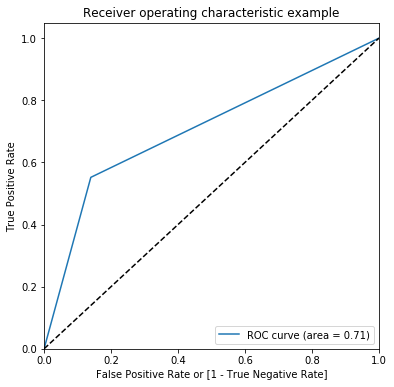

(array([0.        , 0.13961039, 1.        ]),
 array([0.        , 0.55195911, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [219]:
draw_roc(y_test,y_train_pred['churn_pred'])

In [220]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [221]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [222]:
pca.components_

array([[ 0.2967935 , -0.27381733, -0.17910187,  0.52614758,  0.51309372,
        -0.51424683,  0.01771913],
       [ 0.28292675,  0.41214138,  0.1848347 ,  0.08764758,  0.09760194,
         0.09513857,  0.83046282],
       [-0.00412945, -0.76067061,  0.09164424,  0.05077121, -0.48523356,
        -0.047152  ,  0.41558617],
       [ 0.03028702, -0.21737232, -0.04524408,  0.43569408,  0.24284866,
         0.83490626, -0.06254347],
       [-0.00322044, -0.34262969, -0.09665679, -0.68990929,  0.59346597,
         0.1068245 ,  0.18347705],
       [ 0.06008869, -0.10505759,  0.95410156,  0.01394477,  0.18183173,
        -0.05278849, -0.19748064],
       [ 0.90956621, -0.0293402 , -0.06050319, -0.21658784, -0.21798391,
         0.11405695, -0.24643774]])

In [223]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.296793,0.282927,tenure
1,-0.273817,0.412141,PaperlessBilling
2,-0.179102,0.184835,SeniorCitizen
3,0.526148,0.087648,OnlineSecurity
4,0.513094,0.097602,TechSupport


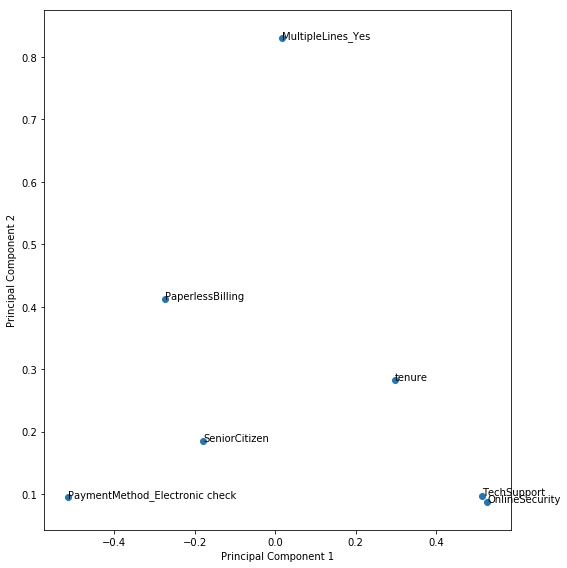

In [224]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

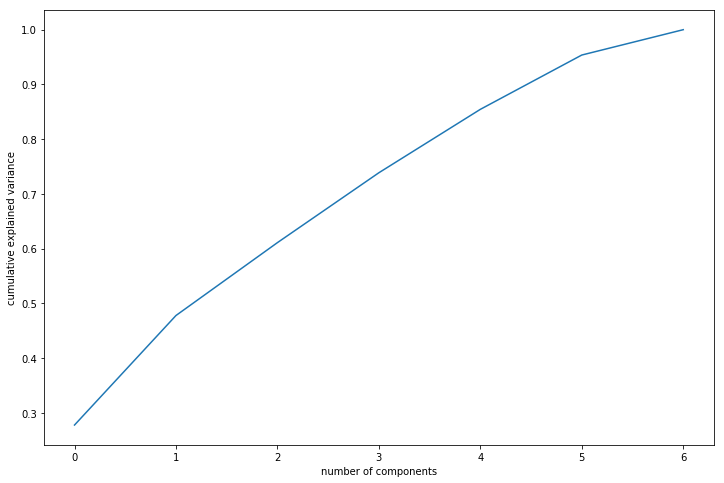

In [225]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [228]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=6)

In [229]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(3693, 6)

In [230]:
corrmat = np.corrcoef(df_train_pca.transpose())

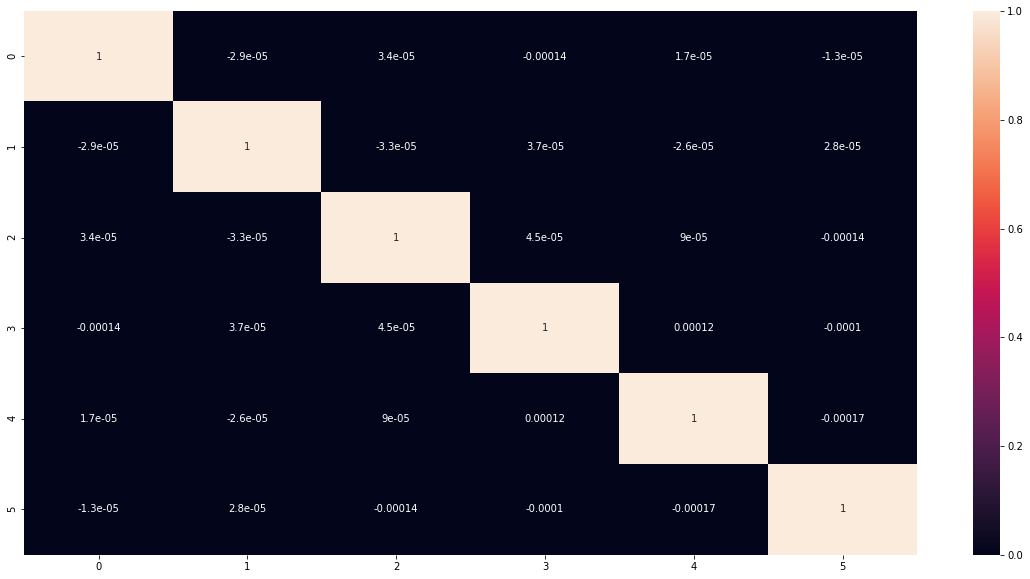

In [231]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [232]:
df_test_pca = pca_final.transform(X_test[X_train.columns])
df_test_pca.shape

(1819, 6)

In [233]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [234]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.77'

In [235]:
pred_probs_test

array([0.21117069, 0.56312971, 0.1440323 , ..., 0.48298044, 0.23346095,
       0.52151798])

In [236]:
y_test

6422    0
5711    1
93      0
6848    0
1547    1
3929    0
1118    0
6531    0
4782    0
2363    0
2375    0
6207    1
4810    1
3669    0
889     1
38      1
2775    1
525     0
3796    1
882     1
2908    1
8       1
4247    0
551     0
6186    1
1356    0
4857    0
6267    1
516     0
2373    0
       ..
6894    1
2397    1
4427    0
607     0
5286    1
1085    1
1261    0
3433    0
1754    0
6634    1
5015    0
4281    0
6724    1
1727    0
4975    0
626     0
1801    0
5054    0
29      1
6938    0
3327    0
1545    0
3894    0
1403    0
3332    1
1978    0
6183    0
5443    0
2909    0
6599    1
Name: Churn, Length: 1819, dtype: int64

In [237]:
pca_again = PCA(0.90)

In [238]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape

(3693, 6)

In [239]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [241]:
df_test_pca2 = pca_again.transform(X_test[X_train.columns])
df_test_pca2.shape

(1819, 6)

In [242]:
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.77'

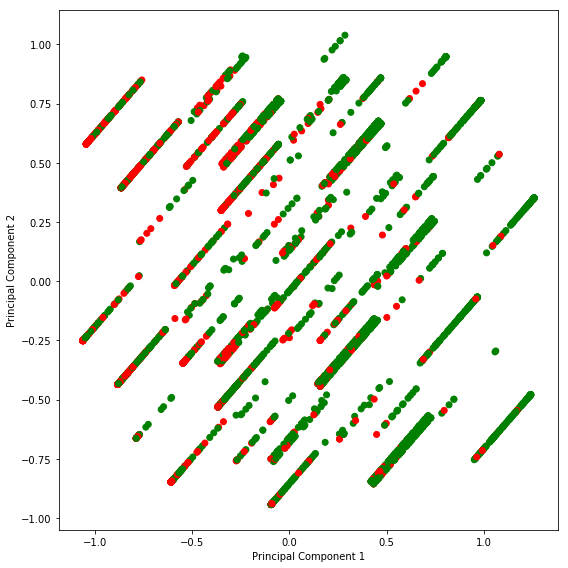

In [243]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


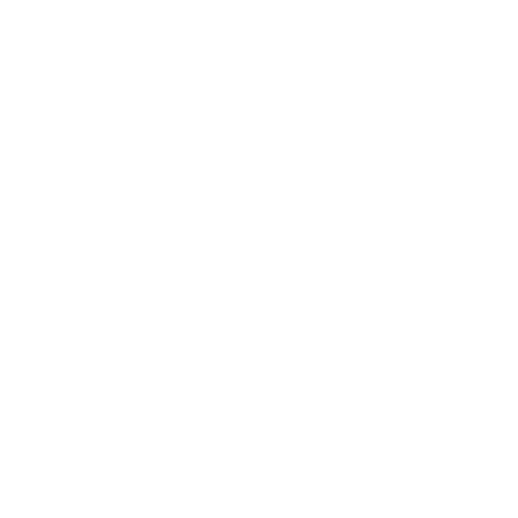

<IPython.core.display.Javascript object>


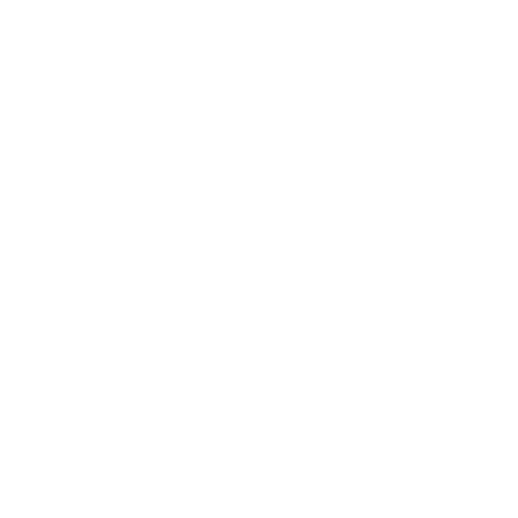

In [246]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train.map({0:'green',1:'red'}))

In [248]:
pca_last = PCA(n_components=3)
df_train_pca3 = pca_last.fit_transform(X_train)
df_test_pca3 = pca_last.transform(X_test[X_train.columns])
df_test_pca3.shape

(1819, 3)

In [252]:
#training the regression model
learner_pca3 = LogisticRegression()
model_pca3 = learner_pca3.fit(df_train_pca3,y_train)
#Making prediction on the test data
pred_probs_test3 = model_pca3.predict_proba(df_test_pca3)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test3))

SyntaxError: unexpected EOF while parsing (<ipython-input-252-52e72d9db6dc>, line 6)

In [250]:
from sklearn.metrics import confusion_matrix

In [263]:
confusion = confusion_matrix(y_test, pd.DataFrame(pred_probs_test3)[0].map(lambda x : 1 if x >0.5 else 0))

In [264]:
tp = float(cm[0][0])/np.sum(cm[0])
tn = float(cm[1][1])/np.sum(cm[1])

In [265]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0]

In [266]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7641921397379913

In [267]:
# Let us calculate specificity
TN / float(TN+FP)

0.5910112359550562

In [268]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.40898876404494383


In [269]:
# positive predictive value 
print (TP / float(TP+FP))

0.8522727272727273


In [271]:
numbers = [x/10 for x in range(10)]

for i in numbers:
    y_train_pred[i] = y_train_pred['Churn_prob'].map(lambda u :1 if u > i else 0 )
    
y_train_pred.head()

,Churn_prob,churn,churn1,churn_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6422,0.088921,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0
5711,0.620803,NaN,NaN,1,1,1,1,1,1,1,1,0,0,0
93,0.089339,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0
6848,0.365805,NaN,NaN,0,1,1,1,1,0,0,0,0,0,0
1547,0.281722,NaN,NaN,0,1,1,1,0,0,0,0,0,0,0


In [273]:
cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred.churn_pred,y_train_pred[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm[0,0]/(cm[0,0]+cm[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]


cutoff_df.head(10)

,prob,accuracy,sensi,speci
0.0,0.0,0.272677,0.852273,1.000000
0.1,0.1,0.518417,0.852273,1.000000
0.2,0.2,0.684442,0.852273,1.000000
0.3,0.3,0.811985,0.852273,1.000000
0.4,0.4,0.919186,0.852273,1.000000
0.5,0.5,1.000000,0.852273,1.000000
0.6,0.6,0.896097,0.852273,0.618952
0.7,0.7,0.789995,0.852273,0.229839
0.8,0.8,0.741616,0.852273,0.052419
0.9,0.9,0.727323,0.852273,0.000000


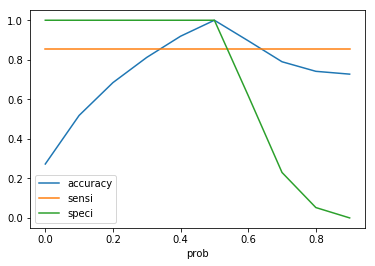

In [279]:
%matplotlib inline
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])